In [22]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 1. Cargar los datos
# Asegúrate de que el archivo 'uac_limpio.csv'
df = pd.read_csv('uac_limpio.csv')

In [6]:
df.head()

,ESCUELA,EDAD,SEXO,EST_CIVIL,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,NIVEL_SOCIO_ECON,SEMESTRE,PPACumulado,PPAnterior
0,ADMINISTRACIÓN,20,1,0,0,0,0,2,4,14.128,14.389
1,ADMINISTRACIÓN,27,0,0,0,1,0,2,5,12.796,12.632
2,ADMINISTRACIÓN,22,0,0,0,1,1,1,10,14.906,15.381
3,ADMINISTRACIÓN,27,1,2,1,1,1,2,7,15.309,15.762
4,ADMINISTRACIÓN,31,0,0,0,1,1,2,10,14.581,13.000


In [7]:
# Eliminar la columna 'ESCUELA' y renombrar el dataset como 'data'
data = df.drop('ESCUELA', axis=1)

In [8]:
data.head()

,EDAD,SEXO,EST_CIVIL,HIJOS,TRABAJA_ESTUDIA,VIVE_SOLO,NIVEL_SOCIO_ECON,SEMESTRE,PPACumulado,PPAnterior
0,20,1,0,0,0,0,2,4,14.128,14.389
1,27,0,0,0,1,0,2,5,12.796,12.632
2,22,0,0,0,1,1,1,10,14.906,15.381
3,27,1,2,1,1,1,2,7,15.309,15.762
4,31,0,0,0,1,1,2,10,14.581,13.000


In [9]:
# Definir las variables independientes (X) y la variable objetivo (y)
X = data.drop('PPACumulado', axis=1)  # Todas las columnas excepto 'PPACumulado'
y = data['PPACumulado']  # Variable objetivo

In [10]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()

# Ajustar el escalador con los datos de entrenamiento y transformarlos
X_train = scaler.fit_transform(X_train)

# Transformar también los datos de prueba
X_test = scaler.transform(X_test)

In [11]:
# Definir el modelo KNN para regresión
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [12]:
# Entrenar el modelo con los datos de entrenamiento
knn_regressor.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = knn_regressor.predict(X_test)

In [13]:
# Calcular y mostrar las métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'Coeficiente de determinación (R^2): {r2:.2f}')

Error cuadrático medio (MSE): 2.85
Coeficiente de determinación (R^2): 0.27


In [14]:
#GRAFICOS
# Importar las bibliotecas necesarias para gráficos
import matplotlib.pyplot as plt
import numpy as np

# Definir el rango de valores de vecinos (k) que vamos a probar
k_values = range(1, 15)  # Probar desde k=1 hasta k=20

# Listas para almacenar las métricas
mse_values = []
r2_values = []

In [15]:
# Probar el modelo KNN para diferentes valores de k
for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)

    # Calcular MSE y R^2 para cada valor de k
    mse_values.append(mean_squared_error(y_test, y_pred))
    r2_values.append(r2_score(y_test, y_pred))

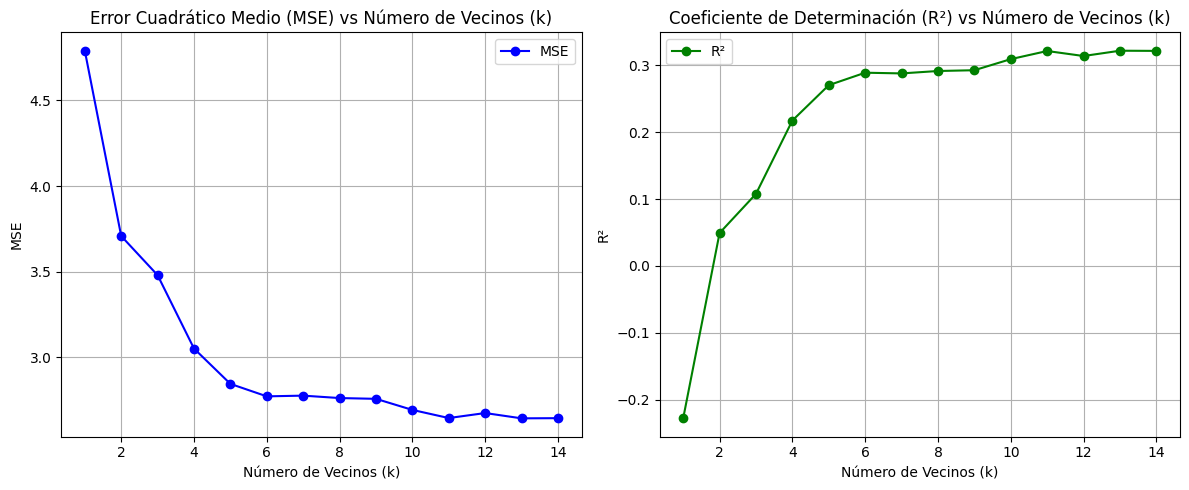

In [16]:
# Graficar el MSE en función de k
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, mse_values, marker='o', color='b', label='MSE')
plt.title('Error Cuadrático Medio (MSE) vs Número de Vecinos (k)')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('MSE')
plt.grid(True)
plt.legend()

# Graficar el R^2 en función de k
plt.subplot(1, 2, 2)
plt.plot(k_values, r2_values, marker='o', color='g', label='R²')
plt.title('Coeficiente de Determinación (R²) vs Número de Vecinos (k)')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('R²')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
# Definir las características del nuevo estudiante (sólo las variables independientes)
nuevo_estudiante = [[22, 0, 0, 0, 0, 1, 2, 10, 17.687]]

# Escalar los datos del nuevo estudiante utilizando el mismo escalador
nuevo_estudiante_scaled = scaler.transform(nuevo_estudiante)

# Predecir el PPAcumulado con el modelo entrenado
ppa_predicho = knn_regressor.predict(nuevo_estudiante_scaled)

print(f'El PPAcumulado predicho para el nuevo estudiante es: {ppa_predicho[0]:.2f}')


El PPAcumulado predicho para el nuevo estudiante es: 14.97


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


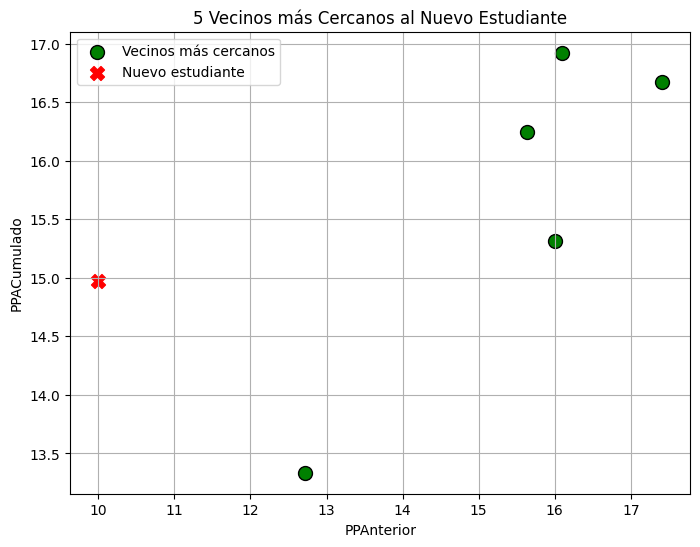

In [38]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Cargar los datos
df = pd.read_csv('uac_limpio.csv')

# Eliminar la columna 'ESCUELA' y renombrar el dataset como 'data'
data = df.drop('ESCUELA', axis=1)

# Definir las variables independientes (X) y la variable objetivo (y)
X = data.drop('PPACumulado', axis=1)  # Todas las columnas excepto 'PPACumulado'
y = data['PPACumulado']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir el modelo KNN para regresión
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento
knn_regressor.fit(X_train, y_train)

# Definir las características del nuevo estudiante (sólo las variables independientes)
nuevo_estudiante = [[22, 0, 0, 0, 0, 1, 2, 10, 17.687]]

# Escalar los datos del nuevo estudiante utilizando el mismo escalador
nuevo_estudiante_scaled = scaler.transform(nuevo_estudiante)

# Obtener los índices de los 5 vecinos más cercanos del nuevo estudiante
distancias, indices = knn_regressor.kneighbors(nuevo_estudiante_scaled)

# Extraer los valores de PPAnterior y PPACumulado de los vecinos
vecinos = data.iloc[indices[0]]

# Graficar los vecinos más cercanos considerando PPAnterior y PPACumulado
plt.figure(figsize=(8, 6))

# Graficar los puntos de los vecinos más cercanos
plt.scatter(vecinos['PPAnterior'], vecinos['PPACumulado'], c='green', label='Vecinos más cercanos', s=100, edgecolor='k')

# Graficar el nuevo estudiante
plt.scatter(nuevo_estudiante[0][7], ppa_predicho[0], c='red', label='Nuevo estudiante', marker='X', s=100)

# Añadir etiquetas y leyenda
plt.xlabel('PPAnterior')
plt.ylabel('PPACumulado')
plt.title('5 Vecinos más Cercanos al Nuevo Estudiante')
plt.legend()
plt.grid(True)
plt.show()
